# The Physics of Hearing

## Anatomy

**Cochlea**: Organ behind the inner ear. Converts pressure into electricity. 
**Stereocillia**: Little hairs within the cochlea. Different hairs correspond to different frequencies.
1. Sound vibrates eardrum.
2. Eardrum vibrates cochlea.
3. Stereocillia (little hairs) inside the cochlea move around.
4. Brain interperets different vibrating hairs as different frequencies.

## Logarithms

$x^n=y$ => $log_x n = y$

Human hearing is logarithmic, so we measure it with a logarithmic unit: The **decibel**. The decibel isn't an absolute unit - there are many sub-types based on reference level.

**dBA**: Special DB scale designed to correlate really well with hearing. It's frequency-adjusted.

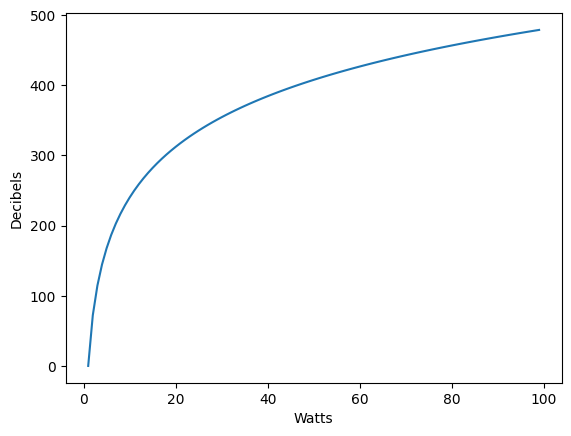

In [1]:
from matplotlib import pyplot as plt
from math import log


def db(p):
    return 20 * log(p, 10) * 12


plt.xlabel("Watts")
plt.ylabel("Decibels")
plt.plot(list(range(1, 100)), list(db(p) for p in range(1, 100)))

## Safety

The modern world is full of noises that are above safe limits. Including:
- Airplanes
- Construction
- Concerts

Long exposore to a moderately loud sound is more damanging than short exposuret to a somewhat louder sound.
- 85 dBA over 8 hours is hazardous
- 130 dBA causes accute trauma.

Stay safe by:
- Wearing ear protection around sustained & acute loud noise.
- Avoid earbuds, or turn them down *below* where they sound good. Confortable listening level is typically ~20 decibels higher than the same preceived volume from a speaker.
- Start at zero and adjust up to the correct volume.

## Perception

**Perceived Volume** is a function of:
- **Background volume level**: Individual sounds seem less loud in a noisy environment.
- **Waveshape**: The brain can "fill in" clopped waves with peaks, making the sound seem louder than it is.
- Accomodation occurs over time.

**Perceived Frequency**:
- Usually in relation to surrounding / earlier pitches.
- Dominated by high-frequency components. 

## Stereo
Human hearing is (usually) **stereo**.

Stereo is sometimes encoded as **sum and difference channels**, with the difference channel at a lower fidelity.

**Localization**: The brain can localize audio as a function of time difference and volume difference.
- **Angle**:
    **Phase difference** is used below 1KHz
    - **Head interference and group delay** is used above 1.5KHz
- **Distance**:
    - Softer, low-frequency sounds seem further away
    - Room effects like reflection increase perceived distance
    - Stereo doesn't help much with distance.

### Encoding

Sum and Difference encoding uses two channels. On one channel it encodes a high-fidelity average of L and R, and on the other it encodes a (usually) lower-fidelity difference between L and R. This 

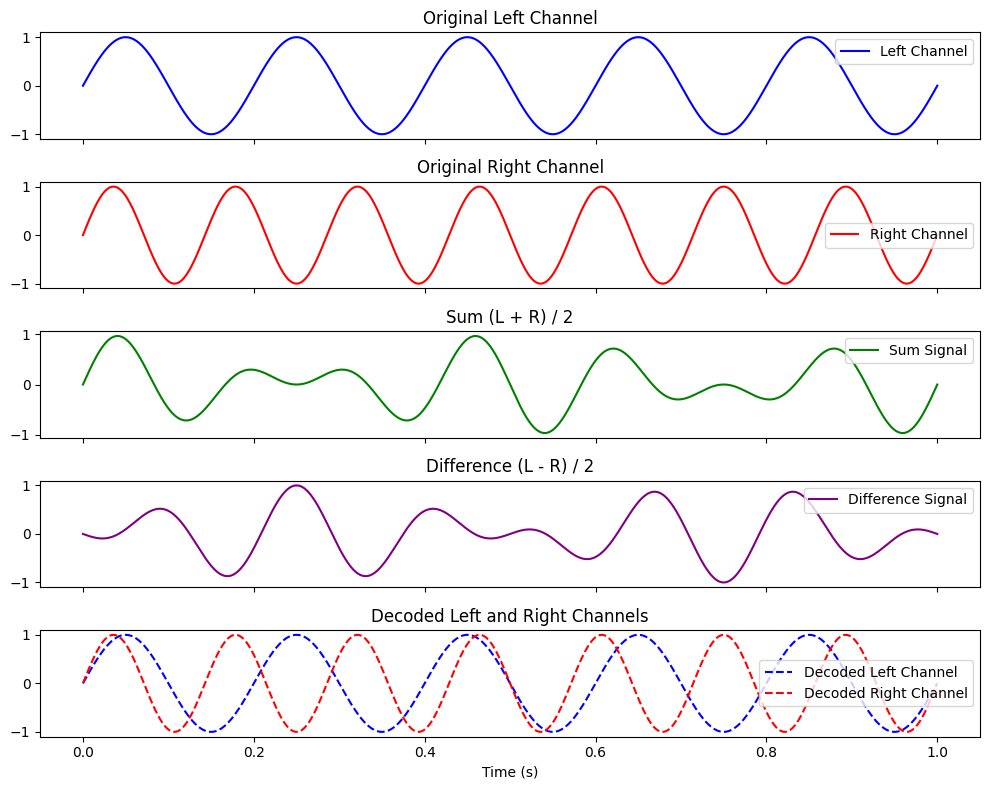

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample stereo audio signals (sine waves for simplicity)
t = np.linspace(0, 1, 1000)
left_channel = np.sin(2 * np.pi * 5 * t)  # Left channel: 5 Hz sine wave
right_channel = np.sin(2 * np.pi * 7 * t)  # Right channel: 7 Hz sine wave

# Sum and difference encoding
sum_signal = (left_channel + right_channel) / 2
difference_signal = (left_channel - right_channel) / 2

# Decoding back to left and right channels (for reference)
decoded_left = sum_signal + difference_signal
decoded_right = sum_signal - difference_signal

# Plotting the original stereo signals, the sum and difference, and the decoded signals
fig, axs = plt.subplots(5, 1, figsize=(10, 8), sharex=True)

axs[0].plot(t, left_channel, label="Left Channel", color="blue")
axs[0].set_title("Original Left Channel")
axs[0].legend()

axs[1].plot(t, right_channel, label="Right Channel", color="red")
axs[1].set_title("Original Right Channel")
axs[1].legend()

axs[2].plot(t, sum_signal, label="Sum Signal", color="green")
axs[2].set_title("Sum (L + R) / 2")
axs[2].legend()

axs[3].plot(t, difference_signal, label="Difference Signal", color="purple")
axs[3].set_title("Difference (L - R) / 2")
axs[3].legend()

axs[4].plot(t, decoded_left, label="Decoded Left Channel", linestyle="--", color="blue")
axs[4].plot(
    t, decoded_right, label="Decoded Right Channel", linestyle="--", color="red"
)
axs[4].set_title("Decoded Left and Right Channels")
axs[4].legend()

plt.xlabel("Time (s)")
plt.tight_layout()
plt.show()

## Noise

**Noise** is a jumble of a bunch of frequencies. Often based on natural sources, like wind or waves.
